# Visualizations
Note the locations and files are assumed to be at the Ohio Supercomputer Center.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

ddir='/users/PCON0003/cond0088/Projects/detectors/sw_outputs/PaperIV_chargediffusion'
#t='chris_20829vis_test13_visinfo.npy'
#t='ami_modmask_20828vis_fid1_visinfo.npy'
t='ami_modmask_20828vis_fid1_1st2ndflats_visinfo.npy'
data=np.load(os.path.join(ddir,t))

def hist_param(dataf,ncol,nx=32,ny=32,nbins=30,figsize=(8,8)):
    # Need to write the bit that takes ncol and associates it to a dictionary with name
    # Currently we can reference the information below
    param=dataf[:,:,ncol].reshape(ny,nx)
    flatparam=param.ravel() # Fix this (unnecessary)
    plt.figure()
    plt.hist(flatparam[~np.isnan(flatparam)],nbins)
    plt.figure(figsize=figsize)
    plt.imshow(param,origin='lower')
    plt.colorbar()
    return param,flatparam

The shape of the ```data``` array is ny * nx * ncol where there are a total of ny * nx superpixels and the ncol are defined below: 
```
# columns  0 .. 24 are the visible BFE kernel in e^-1 (order: dy=-2 dx=-2; dy=-2 dx=-1; dy=-2 dx=0; ...)
# columns 25 .. 49 are the visible Phi kernel (order: dy=-2 dx=-2; dy=-2 dx=-1; dy=-2 dx=0; ...)
# column 50 is the quantum yield omega parameter
# column 51 is Cxx charge diffusion in pixels^2
# column 52 is Cxy charge diffusion in pixels^2
# column 53 is Cyy charge diffusion in pixels^2
# column 54 is visible current Ie (e per frame)
# column 55 is number of iterations in p2 kernel
```

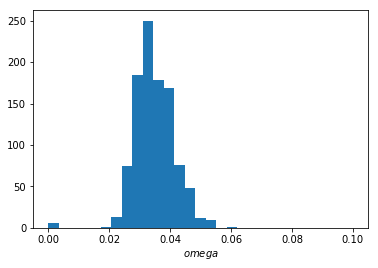

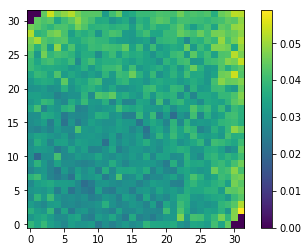

In [2]:
# Look at the omega parameter
om=data[:,:,50]
flatom=om.ravel()
num_bins=30
#plt.hist(flatom[~np.isnan(flatom)])
# Looks like there are some nan values that prevent hist from working automatically
plt.hist(flatom,bins=np.linspace(0, 0.1, num=num_bins))
plt.xlabel('$omega$')
plt.figure()
plt.imshow(om,origin='lower')
plt.colorbar()

(array([[0.03905684, 0.03460526, 0.03940846, ..., 0.04456997, 0.        ,
         0.        ],
        [0.03116787, 0.03422622, 0.03597298, ..., 0.03847021, 0.04789733,
         0.        ],
        [0.03711134, 0.03289236, 0.03099319, ..., 0.03094269, 0.04763764,
         0.05890949],
        ...,
        [0.04622704, 0.04391468, 0.04093866, ..., 0.04279807, 0.04903906,
         0.05004058],
        [0.        , 0.04424828, 0.0423015 , ..., 0.04444092, 0.04362437,
         0.04890475],
        [0.        , 0.        , 0.04451444, ..., 0.04703982, 0.05277518,
         0.05241273]]),
 array([0.03905684, 0.03460526, 0.03940846, ..., 0.04703982, 0.05277518,
        0.05241273]))

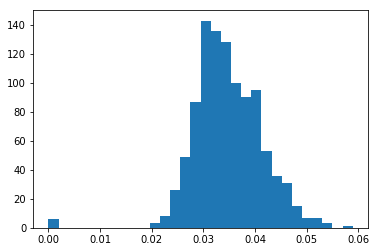

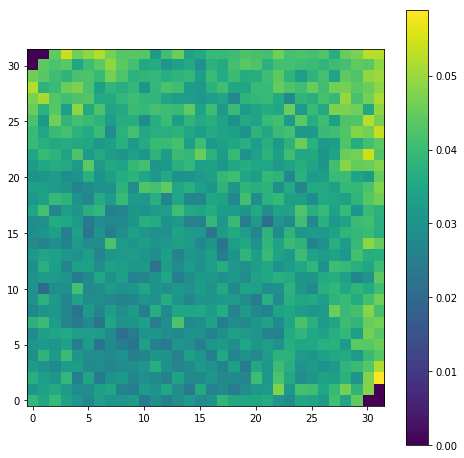

In [3]:
hist_param(data,50,nx=32,ny=32,nbins=30,figsize=(8,8))

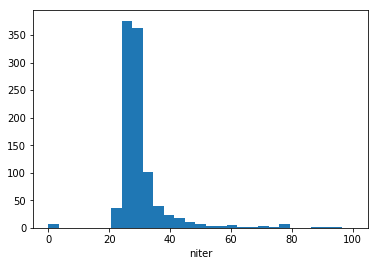

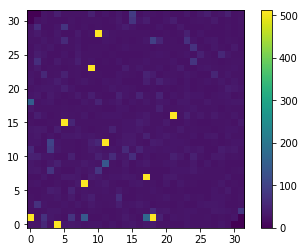

In [4]:
# iterations in the p2 kernel
nit=data[:,:,55]
flatnit=nit.ravel()
num_bins=30
plt.hist(flatnit,bins=np.linspace(0, 100, num=num_bins))
plt.xlabel('niter')
plt.figure()
plt.imshow(nit,origin='lower')
plt.colorbar()

[]
[]
[]
[0. 0. 0. 0. 0. 0.]


Text(0.5,0,'charge diffusion component in pixels$^2$')

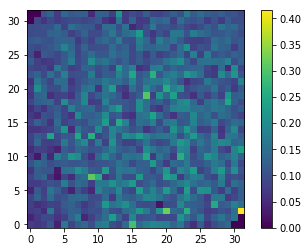

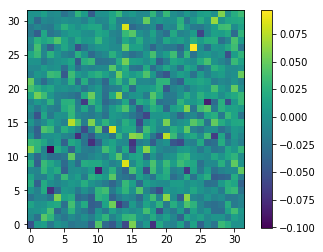

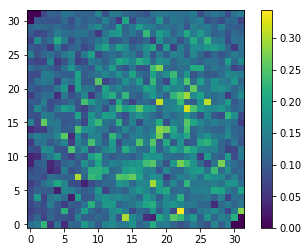

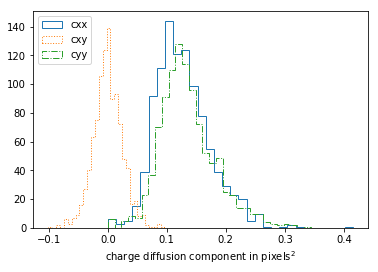

In [5]:
# Charge diffusion parameters
cxx=data[:,:,51]
cxy=data[:,:,52]
cyy=data[:,:,53]
flatcxx=cxx.ravel()
flatcxy=cxy.ravel()
flatcyy=cyy.ravel()
# There is/are 1 nan vals for cxx and cyy, and 2 for cxy
flatcxx_nan=np.isnan(flatcxx)
flatcxy_nan=np.isnan(flatcxy) 
flatcyy_nan=np.isnan(flatcyy)
print(flatcxx[flatcxx_nan==True])
print(flatcxy[flatcxy_nan==True])
print(flatcyy[flatcyy_nan==True])
print(flatcxx[flatcxx==0])
plt.imshow(cxx,origin='lower')
plt.colorbar()
plt.figure()
plt.imshow(cxy,origin='lower')
plt.colorbar()
plt.figure()
plt.imshow(cyy,origin='lower')
plt.colorbar()

# We could also plot the histograms of these to compare the distributions
plt.figure()
plt.hist(flatcxx[~flatcxx_nan],30,histtype='step',label='cxx',ls='-')
plt.hist(flatcxy[~flatcxy_nan],30,histtype='step',label='cxy',ls=':')
plt.hist(flatcyy[~flatcyy_nan],30,histtype='step',label='cyy',ls='-.')
plt.legend()
plt.xlabel('charge diffusion component in pixels$^2$')

[[ 1.27471696e-01 -1.00234798e-04]
 [-1.00234798e-04  1.35621271e-01]]
(32, 32)


(-1, 32)

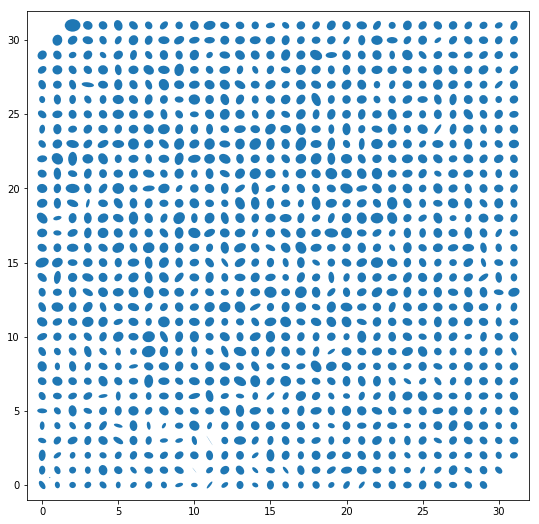

In [6]:
# Function adapted from
# https://www.programcreek.com/python/example/61396/matplotlib.patches.Ellipse
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, nstd=1, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()
        
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip 
# Construct the mean cov
pos=[0.5,0.5]
mean_cov=np.zeros((2,2))
mean_cov[0,0]=np.mean(flatcxx[~flatcxx_nan])
mean_cov[1,0]=mean_cov[0,1]=np.mean(flatcxy[~flatcxy_nan])
mean_cov[1,1]=np.mean(flatcyy[~flatcyy_nan])
fig, axs = plt.subplots(1, 1, figsize=(9, 9))
plot_cov_ellipse(mean_cov, pos, nstd=0.1, ax=axs)
print(mean_cov)
# Grid of covs for each superpixel
print(cxx.shape)
for idx in range(cxx.shape[0]):
    for jdx in range(cxx.shape[1]):
        meancov=np.zeros((2,2))
        mean_cov[0,0]=cxx[jdx][idx]
        mean_cov[1,0]=mean_cov[0,1]=cxy[jdx][idx]
        mean_cov[1,1]=cyy[jdx][idx]
        plot_cov_ellipse(mean_cov, [jdx,idx], nstd=0.8, ax=axs)
axs.set_xlim(-1,32)
axs.set_ylim(-1,32)

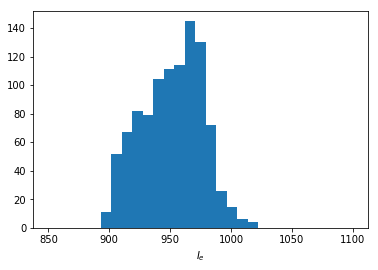

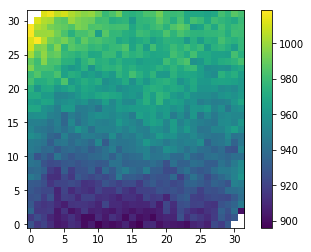

In [7]:
# Look at the Ie parameter
ie=data[:,:,54]
flatie=ie.ravel()
num_bins=30
#plt.hist(flatie[~np.isnan(flatie)])
# Looks like there are some nan values that prevent hist from working automatically
plt.hist(flatie,bins=np.linspace(850, 1100, num=num_bins))
plt.xlabel('$I_e$')
plt.figure()
plt.imshow(ie,origin='lower')
plt.colorbar()

## Let's look at some of Chris's runs with different dimensions of superpixels
```grep -r "NBIN: 128 8" *config.txt``` from within the directory ```/users/PCON0003/cond0088/Projects/detectors/sw_outputs/PaperIV_chargediffusion``` shows that test14 and test16 both have this configuration of superpixels.  Looks like the difference is that test16 includes a bunch of "second" in the sequence flats (and also the results are not available as of Jan 7 4pm)

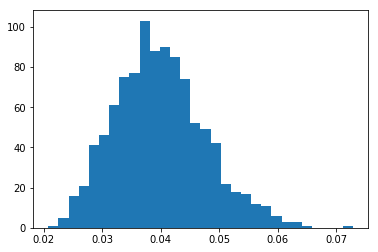

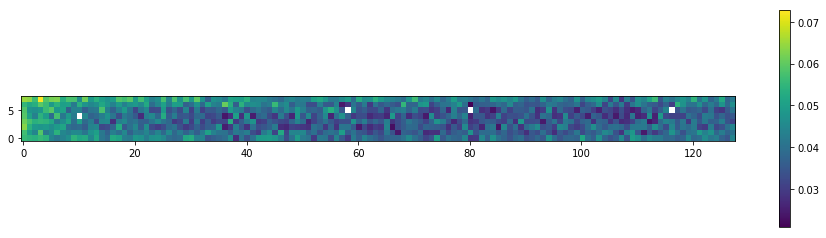

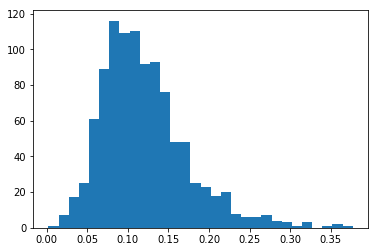

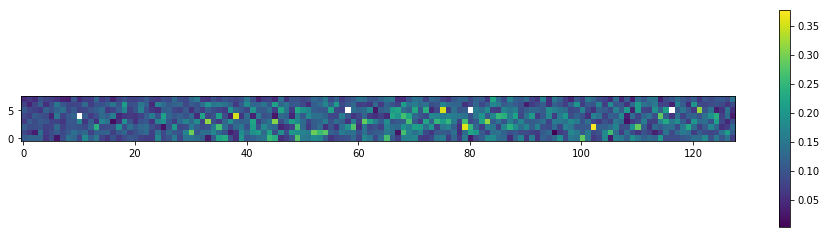

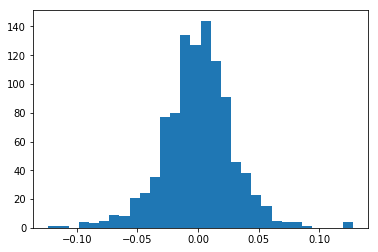

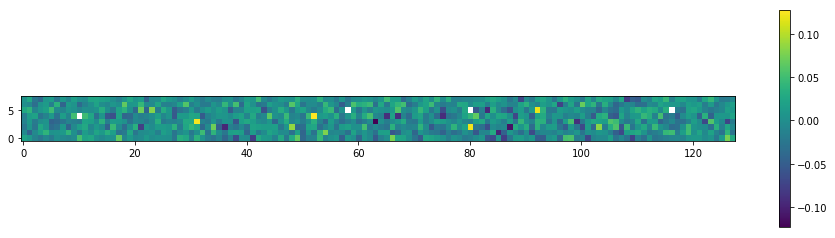

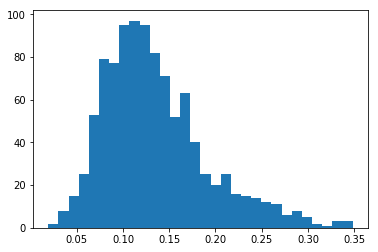

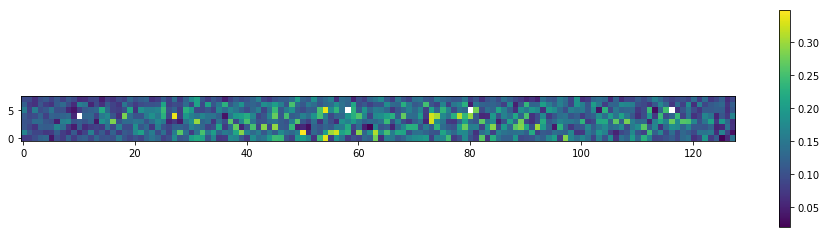

In [8]:
t_test14='chris_20829vis_test14_visinfo.npy'
d_test14=np.load(os.path.join(ddir,t_test14))
# omega
om,flatom=hist_param(d_test14,50,nx=128,ny=8,nbins=30,figsize=(16,4))
# cxx, cxy, cyy
cxx,flatcxx=hist_param(d_test14,51,nx=128,ny=8,figsize=(16,4))
cxy,flatcxy=hist_param(d_test14,52,nx=128,ny=8,figsize=(16,4))
cyy,flatcyy=hist_param(d_test14,53,nx=128,ny=8,figsize=(16,4))

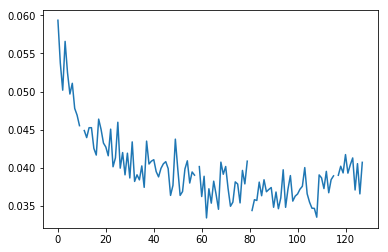

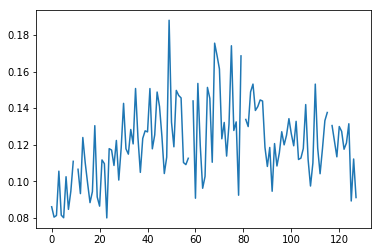

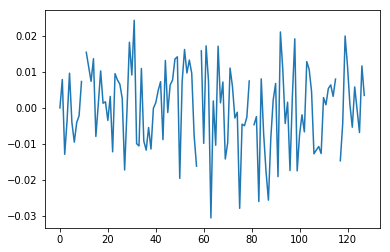

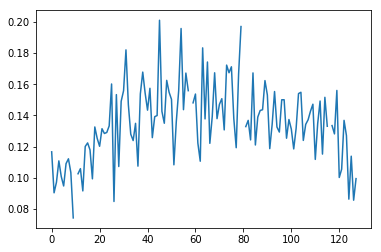

In [9]:
# Collapse in one dimension to see if there are any features that stand out

plt.plot(om.mean(axis=0))
plt.figure()
plt.plot(cxx.mean(axis=0))
plt.figure()
plt.plot(cxy.mean(axis=0))
plt.figure()
plt.plot(cyy.mean(axis=0))

## Running treecorr on the grid of ellipticities
To run this you'll need to have TreeCorr installed.  Lots of info here, including a link to a notebook with examples
https://github.com/rmjarvis/TreeCorr

We can run this over the superpixel grid of e1, e2 we have.

In [10]:
import treecorr
import numpy as np

# Read in e1, e2 from file Jahmour made
file = open('ellip_data_chris_20829vis_fid1_32x32.dat')
a = np.genfromtxt(file,delimiter=' ', dtype = 'str')

file.close()
a = np.char.strip(a, '[')
a = np.char.strip(a, ']')
a = np.char.strip(a, ',').astype(float)
e1 = a[:,0].copy()
e2 = a[:,1].copy()
x = a[:,3].copy() # Check which is x and which is y
y = a[:,4].copy()
# WFI detector pixel scale in arcseconds/pixel is 0.11, so one superpixel (32x32) is ~14 arcsec across
x *= 0.11*128  # units from arcsec/superpixel to obtain x in arcsec
y *= 0.11*128

[11684. 12828. 20864. 30558. 38862. 51964. 55648. 77888. 84000.]
[11684. 12828. 20864. 30558. 38862. 51964. 55648. 77888. 84000.]


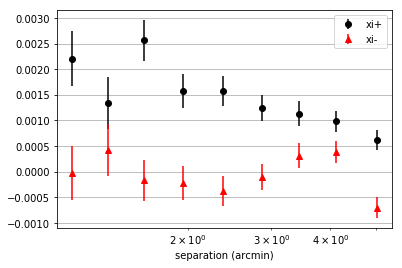

In [12]:
import matplotlib.pyplot as plt
# Set up and compute correlations with treecorr
cat = treecorr.Catalog(ra=x, dec=y, ra_units='arcsec', dec_units='arcsec', g1=e1, g2=e2)
# Remember that a single detector is about 7.5 arcmin on a side, so this sets a maximum scale
gg = treecorr.GGCorrelation(min_sep=1., max_sep=5.5, bin_size=0.2,sep_units='arcmin')
gg.process(cat)
xip = gg.xip  # The xi_plus correlation function
xim = gg.xim
err_xip = np.sqrt(gg.varxip)
err_xim = np.sqrt(gg.varxim)
npairs = gg.npairs
wt = gg.weight # There were no weights, so this will be the same as npairs
r = np.exp(gg.meanlogr)
print(npairs)
print(wt)

# Plotting
plt.errorbar(r, xip, yerr=err_xip, fmt='ko', label='xi+')
plt.errorbar(r, xim, yerr=err_xim, fmt='r^', label='xi-')
plt.xlabel('separation (arcmin)')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()
# This high amplitude might be a function of how the ellipticities were calculated from the covariance

## Comparison of the non-linearity parameters we are getting from Paper III to Paper IV

Both papers are using 4th order polynomials.

Paper III used frames 1 to 10 to fit the polynomial. This is described around page 23.  Paper IV is using frames 1 to 16. As one can imagine that polynomials fit to different frames might differ substantially, Chris suggested comparing
$$ \sum_{\nu}\beta_{\nu} g^{\nu-1}S^{\nu} = \beta_{2} gS^{2}+\beta_{3} g^{2}S^{3}+\beta_{4} g^{3}S^{4}$$
where $\nu$ will run over 2, 3, 4, and this quantity has units of signal, or DN.

Relevant Paper III values:

|   |  SCA 20663 | SCA 20828  | SCA 20829  |
|:-:|:-:|:-:|:-:|
| charge per time slice (ke)  | 3.5055  | 3.0869  | 3.0515  |
| gain (e/DN)  | 1.6232  | 1.6654   | 1.7285  |
| $\beta_{2}$g ($10^6\textrm{DN}^{−1}$)  | 2.7899  | 2.1758  | 2.8147  |
| $\beta_{3}$g$^2$ ($10^{10} \textrm{DN}^{−2}$)  | -0.8173 | -0.7621  | -1.0841  |
| $\beta_{4}$g$^3$ ($10^{15} \textrm{DN}^{−3}$)  | 1.5245  | 1.6909  | 2.3025  |

Relevant Paper IV values:

|   |  SCA 20663 | SCA 20828  | SCA 20829  |
|:-:|:-:|:-:|:-:|
| charge per time slice (ke)  | 3.4918  | 3.0666  | 3.0376  |
| gain (e/DN)  | 1.6264  | 1.6615   | 1.7357  |
| $\beta_{2}$g ($10^6\textrm{DN}^{−1}$)  | 1.8884  | 1.3793  | 1.7637  |
| $\beta_{3}$g$^2$ ($10^{10} \textrm{DN}^{−2}$)  | -0.2857 | -0.2354  | -0.4255  |
| $\beta_{4}$g$^3$ ($10^{15} \textrm{DN}^{−3}$)  | 0.4966  | 0.5329  | 0.8553  |

Equation 32 from Freudenburg, Givans et al. gives the relationship between the signal at a time slice and the charge.  Since Paper III used only up to frame 10, we can use the accumulated charge (the values from the table above multiplied by the accumulated time at frame 10) to determine the signal.



In [2]:
import numpy as np

def sum_comp(bc,S):
    """bc is an array of beta coefficients in the order beta2 x g, beta3 x g^2, beta4 x g^3
    S is the signal at the given time frame
    """
    return bc[0]*S + bc[1]*S**2 + bc[2]*S**3

def charge_to_s(chargeperframe,bc,g,t,tframe):
    """bc is the same as in the prev function. charge is the charge per time slice, g is gain
    t is the length of the time step, typically 2.75sec, and tframe is the frame number"""
    Qtot=chargeperframe*t*(tframe-1)
    S=(1./g)*(Qtot-(bc[0]/g)*Qtot**2-(bc[1]/g**2)*Qtot**3-(bc[2]/g**3)*Qtot**4)
    return S
    

In [7]:
# Starting with SCA 20663
Q3=3.5055*1000 # e/time slice
Q4=3.4918*1000 # e/time slice
g3=1.6232 # e/DN
g4=1.6264 # e/DN
frame=10
t=2.75 # s
beta_coef3=np.array((2.7899E-6,-0.8173E-10,1.5245E-15)) # DN**-1, DN**-2, DN**-3
beta_coef4=np.array((1.8884E-6,-0.2857E-10,0.4966E-15))

# Call the functions in the previous cell to compute the sum
S_paper3=charge_to_s(Q3,beta_coef3,g3,t,frame)
sum_paper3 = sum_comp(beta_coef3,S_paper3)
S_paper4=charge_to_s(Q4,beta_coef4,g4,t,frame)
sum_paper4 = sum_comp(beta_coef4,S_paper4)

In [8]:
print(sum_paper3)
print(sum_paper4)

0.10142485828125797
0.08008011794942106
